# Stock Price Prediction using **LSTM**, **Prophet** and **ARIMA**

Stock market being highly volatile, there is a huge amount of uncertainty and risk associated with them. For a good and successful investment, many investors are keen in knowing the future situation of the stock market. Good and effective prediction systems for stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market. Here we are presenting three innovative method to predict the future closing prices of stocks using combination of deep learning approach using Long Short-Term Memory (LSTM), prophet and Auto Regressive Integrated Moving Average (ARIMA) time series model to predict the future closing prices of stocks.

**Raw Data**

The historical "APPLE" stock data is collected from the link https://finance.yahoo.com/quote/AAPL/history/

# 1. Importing Libraries

In [ ]:
import pandas
import math
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 2. Loading the Data

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 807 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
## Get the APPLE stock data
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 6, 22)
df = yf.download("AAPL", start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540047,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607434,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747406,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880663,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860234,394024400
...,...,...,...,...,...,...
2020-06-15,83.312500,86.419998,83.144997,85.747498,84.572258,138808800
2020-06-16,87.864998,88.300003,86.180000,88.019997,86.813606,165428800
2020-06-17,88.787498,88.849998,87.772499,87.897499,86.692795,114406400


# 3. Data Preprocessing

In [ ]:
print(df.head())
print(df.shape)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.540047  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.607434  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.747406  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.880663  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.860234  394024400
(2130, 6)


Pandas dataframe.rolling() function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.

In [ ]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

**Visualize the data**

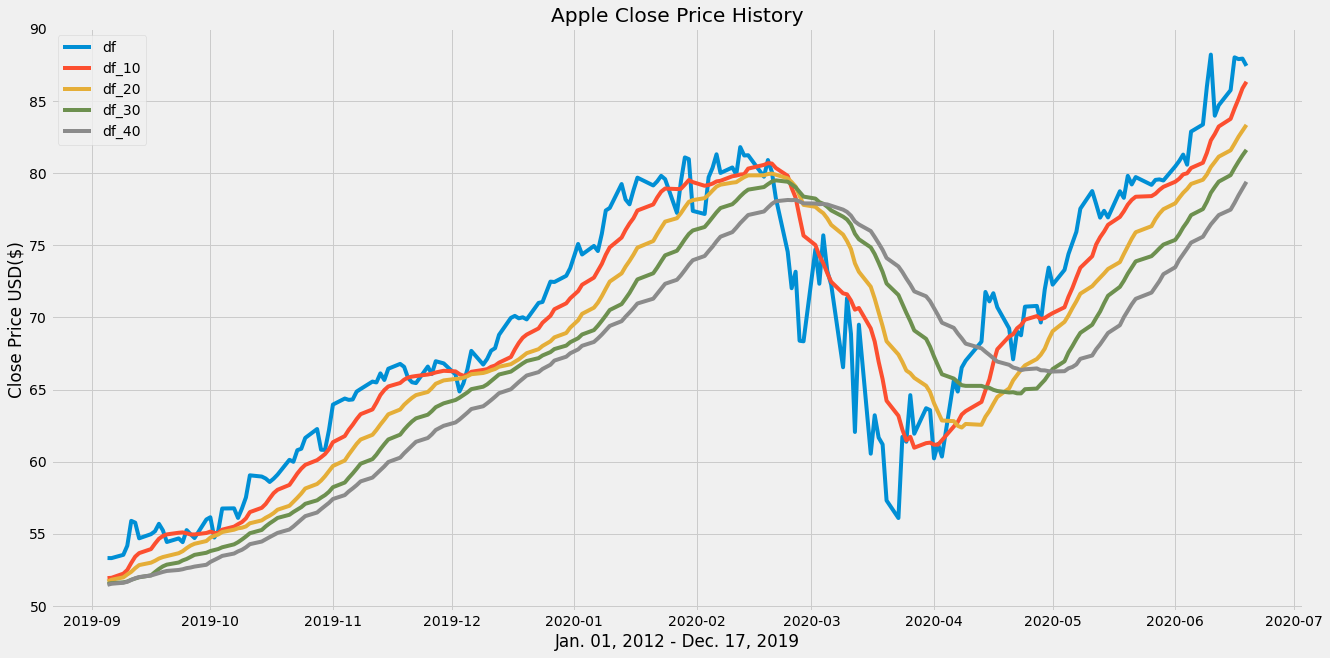

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Dec. 17, 2019')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [ ]:
#Convert the dataframe to a numpy array
dataset = data.values

# 4. Splitting Data into Training and Testing

In [ ]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1704

**Scaling the data**

In [ ]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape


(array([[0.00995503],
        [0.01101786],
        [0.01322528],
        ...,
        [0.99579195],
        [0.9962633 ],
        [0.98949673]]), (2130, 1))

In [ ]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01431696, 0.01773631, 0.01436987,
       0.02699401, 0.02601775, 0.02729218, 0.03004785, 0.03171663,
       0.03157717, 0.03106259, 0.03325558, 0.03531872, 0.037656  ,
       0.04143122, 0.04936158, 0.04948181, 0.05389666, 0.05719575,
       0.05152573, 0.05370909, 0.05366581, 0.05978792, 0.05891744,
       0.06052852, 0.06342365, 0.06503475, 0.06967562, 0.07305647,
       0.07403274, 0.07437421, 0.06859356, 0.06719888, 0.06740568,
       0.07284008, 0.0743694 , 0.07765409, 0.08539688, 0.09572703,
       0.09379373, 0.09379853, 0.10126722, 0.10360451, 0.1019405 ,
       0.10042081, 0.09883858, 0.10409502, 0.10770193, 0.10921202])]
[0.10548007307678448]

[array([0.00995503, 0.01101786, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408131, 0.01643302,
       0.01855388, 0.01789982, 0.01

In [ ]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1644, 60, 1)

# Building the LSTM model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1644/1644 [==============================] - 71s 41ms/step - loss: 5.5643e-04
Epoch 2/5
1644/1644 [==============================] - 54s 33ms/step - loss: 2.6199e-04
Epoch 3/5
1644/1644 [==============================] - 63s 38ms/step - loss: 1.9939e-04
Epoch 4/5
1644/1644 [==============================] - 48s 29ms/step - loss: 1.3795e-04
Epoch 5/5
1644/1644 [==============================] - 48s 29ms/step - loss: 1.2514e-04


In [ ]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
print(predictions[0:5], y_test[0:5])

[[57.595074]
 [55.065083]
 [54.444244]
 [56.464626]
 [55.525494]] [[54.09000015]
 [53.61249924]
 [55.52750015]
 [54.34000015]
 [55.53749847]]


# **Get the MSE & RMSE**

In [ ]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(0.9195481915917696, 0.9589307543257592)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


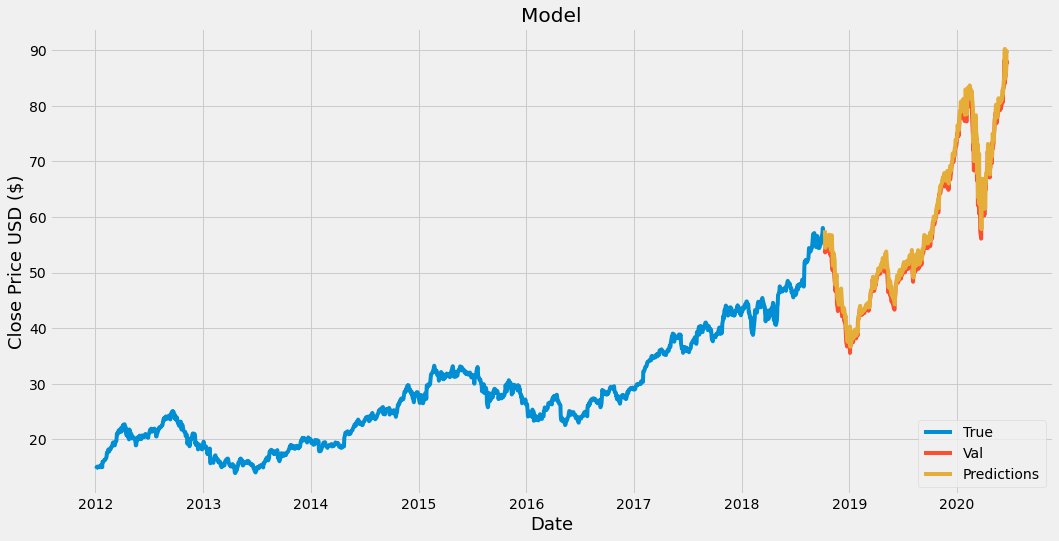

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

# **APPLE price prediction using Prophet**


https://www.youtube.com/watch?v=AX1wKnBPhvU

https://www.viralml.com/video-content.html?v=AX1wKnBPhvU

https://www.youtube.com/watch?v=95-HMzxsghY&t=689s
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
```
```



**Load EDA libraries**

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.6 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import prophet

In [ ]:
dir(prophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

## Load the data

In [ ]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 6, 22)
df = yf.download("AAPL", start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540051,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607435,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747407,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880661,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860233,394024400
...,...,...,...,...,...,...
2020-06-15,83.312500,86.419998,83.144997,85.747498,84.572266,138808800
2020-06-16,87.864998,88.300003,86.180000,88.019997,86.813622,165428800
2020-06-17,88.787498,88.849998,87.772499,87.897499,86.692795,114406400


In [ ]:
## Get the number of rows and columns
df = df.reset_index()

In [ ]:
df.shape, df.tail(), df.columns

((2130, 7),
            Date       Open       High        Low      Close  Adj Close  \
 2125 2020-06-15  83.312500  86.419998  83.144997  85.747498  84.572266   
 2126 2020-06-16  87.864998  88.300003  86.180000  88.019997  86.813622   
 2127 2020-06-17  88.787498  88.849998  87.772499  87.897499  86.692795   
 2128 2020-06-18  87.852501  88.362503  87.305000  87.932503  86.727325   
 2129 2020-06-19  88.660004  89.139999  86.287498  87.430000  86.231712   
 
          Volume  
 2125  138808800  
 2126  165428800  
 2127  114406400  
 2128   96820400  
 2129  264476000  ,
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object'))

In [ ]:
df = df.filter(['Date','Close'])
df.head()

,Date,Close
0,2012-01-03,14.686786
1,2012-01-04,14.765714
2,2012-01-05,14.929643
3,2012-01-06,15.085714
4,2012-01-09,15.061786


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2130 non-null   datetime64[ns]
 1   Close   2130 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.4 KB


In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.head()

In [ ]:
# To filter negative values
df.index[df['Close'] < 0]

Int64Index([], dtype='int64')

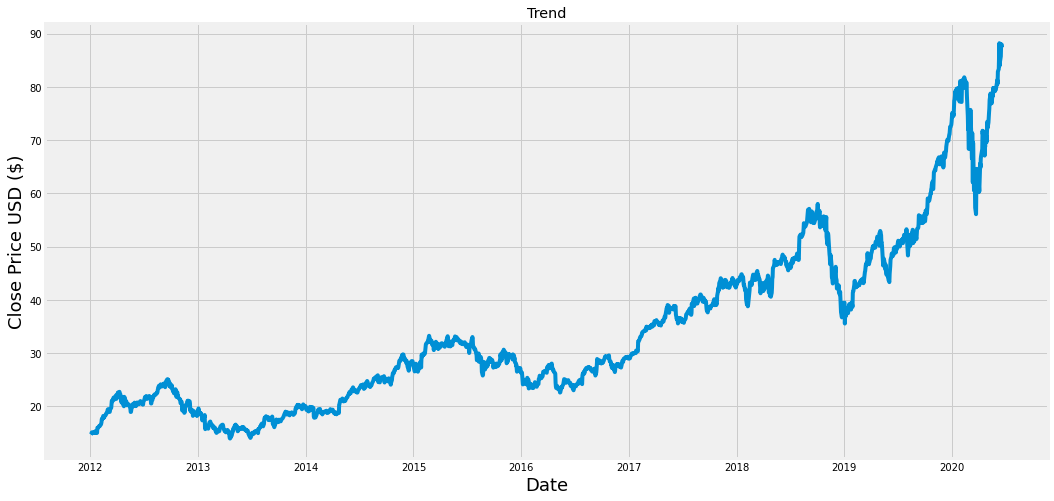

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# yt = yt-y(t-1) 
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close_shift']

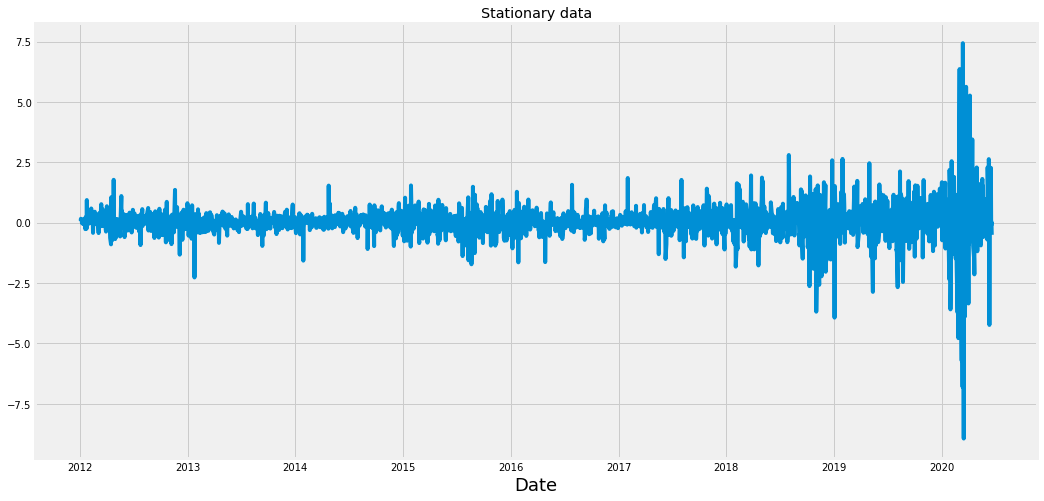

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

Now, the above graph looks stationary

## Initialize the model

In [ ]:
from prophet import Prophet
model = Prophet()

Paremeters

growth: linear/logistic

seasonality:additive/multiplicative

holidays:changepoint

In [ ]:
df.columns

Index(['Date', 'Close', 'Close_shift'], dtype='object')

In [ ]:
## Rename the columns as ds and y
df_pht = df.rename(columns={'Date':'ds', 'Close_shift':'y'})#, inplace=True)

In [ ]:
df_pht.head()

,ds,Close,y
0,2012-01-03,14.686786,NaN
1,2012-01-04,14.765714,0.078928
2,2012-01-05,14.929643,0.163929
3,2012-01-06,15.085714,0.156072
4,2012-01-09,15.061786,-0.023929


## Split the Data

In [ ]:
train_data_len = int(0.8*len(df))
train_data_len

1704

In [ ]:
df_train = df_pht[:train_data_len]
df_test = df_pht[train_data_len:]
df_train.head(), df_train.shape

(          ds      Close         y
 0 2012-01-03  14.686786       NaN
 1 2012-01-04  14.765714  0.078928
 2 2012-01-05  14.929643  0.163929
 3 2012-01-06  15.085714  0.156072
 4 2012-01-09  15.061786 -0.023929, (1704, 3))

# Fit Model to Data

In [ ]:
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayam9tms/3z7799yo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpayam9tms/0s2yf5wn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36550', 'data', 'file=/tmp/tmpayam9tms/3z7799yo.json', 'init=/tmp/tmpayam9tms/0s2yf5wn.json', 'output', 'file=/tmp/tmpnwn96jub/prophet_model-20220815153742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:37:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:37:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
periods = len(df)-len(df_train)
periods

426

In [ ]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [ ]:
# Shape after adding 401 days
future_dates.shape

(2130, 1)

In [ ]:
future_dates.head()

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09


## Make Prediction 

In [ ]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,0.014376,-0.542717,0.525747,0.014376,0.014376,-0.011097,-0.011097,-0.011097,-0.008535,-0.008535,-0.008535,-0.002563,-0.002563,-0.002563,0.0,0.0,0.0,0.003279
1,2012-01-04,0.014391,-0.492589,0.541801,0.014391,0.014391,-0.005657,-0.005657,-0.005657,-0.004449,-0.004449,-0.004449,-0.001208,-0.001208,-0.001208,0.0,0.0,0.0,0.008734
2,2012-01-05,0.014406,-0.575304,0.500806,0.014406,0.014406,-0.050568,-0.050568,-0.050568,-0.049425,-0.049425,-0.049425,-0.001143,-0.001143,-0.001143,0.0,0.0,0.0,-0.036162
3,2012-01-06,0.014421,-0.605424,0.490007,0.014421,0.014421,-0.062004,-0.062004,-0.062004,-0.059649,-0.059649,-0.059649,-0.002355,-0.002355,-0.002355,0.0,0.0,0.0,-0.047582
4,2012-01-09,0.014467,-0.499382,0.596905,0.014467,0.014467,0.044577,0.044577,0.044577,0.057530,0.057530,0.057530,-0.012953,-0.012953,-0.012953,0.0,0.0,0.0,0.059043


Narrative

yhat : the predicted forecast

yhat_lower : the lower border of the prediction

yhat_upper: the upper border of the prediction

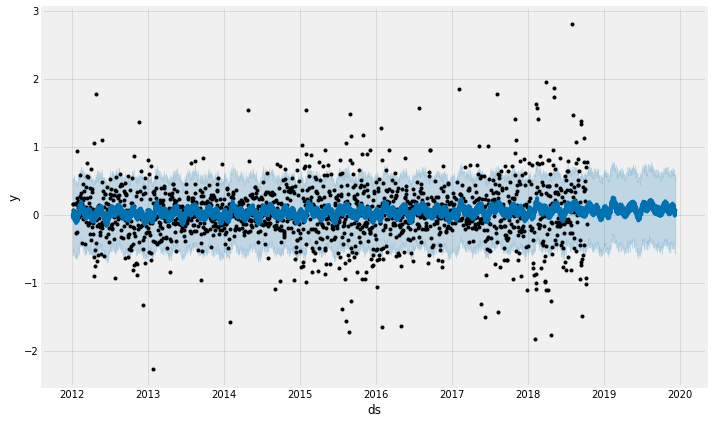

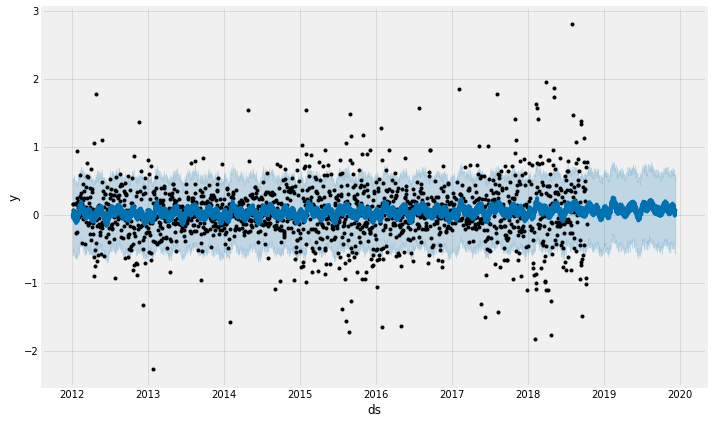

In [ ]:
# Plot Our Predictions
model.plot(prediction)

Narrative

A Trending data

Black dots : the actual data points in our dataset.

Deep blue line : the predicted forecast/the predicted values

Light blue line : the boundaries

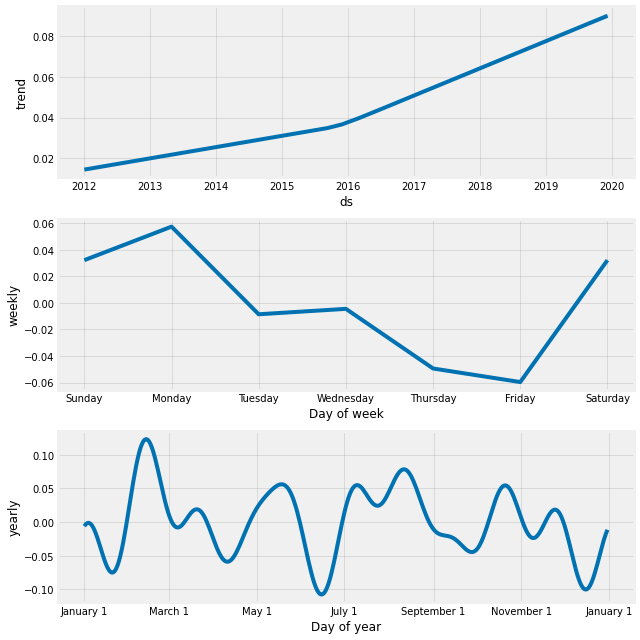

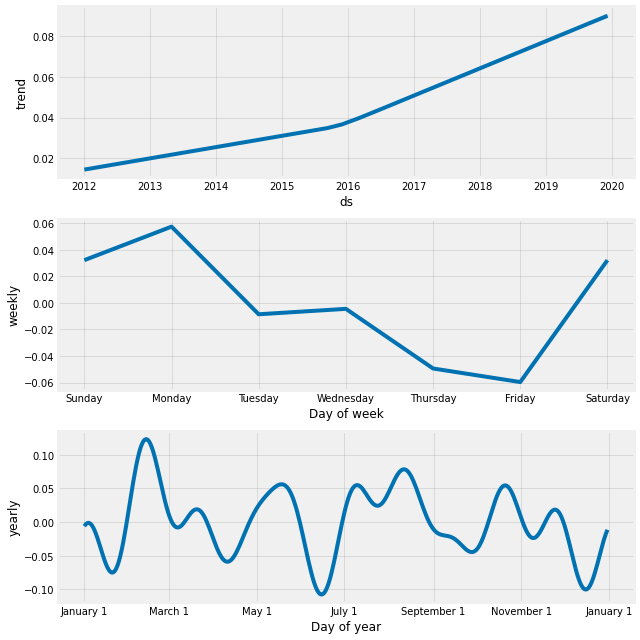

In [ ]:
model.plot_components(prediction)

## Cross Validation

For measuring forecast error by comparing the predicted values with the actual values

initial:the size of the initial training period

period : the spacing between cutoff dates

horizon : the forecast horizon((ds minus cutoff)

By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [ ]:
# import cross_validation
from prophet.diagnostics import cross_validation

In [ ]:
df_train.shape, len(df)-len(df_train)

((1704, 3), 426)

In [ ]:
cv = cross_validation(model, initial='1704 days', period='1 days', horizon = '427 days')

In [ ]:
cv.head(), cv.shape

(          ds      yhat  yhat_lower  yhat_upper         y     cutoff
 0 2016-09-06  0.018119   -0.447692    0.489447 -0.007502 2016-09-03
 1 2016-09-07  0.040557   -0.444822    0.557572  0.165001 2016-09-03
 2 2016-09-08  0.008198   -0.491116    0.483111 -0.710001 2016-09-03
 3 2016-09-09 -0.002913   -0.456923    0.484413 -0.597500 2016-09-03
 4 2016-09-12  0.103842   -0.401065    0.550427  0.577501 2016-09-03,
 (100084, 6))

## Performance Metrics

In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
df_train_pm = performance_metrics(cv)

INFO:prophet:Skipping MAPE because y close to 0


In [ ]:
df_train_pm

,horizon,mse,rmse,mae,mdape,smape,coverage
0,43 days,0.142079,0.376933,0.255999,0.988067,1.557942,0.857698
1,44 days,0.142249,0.377159,0.256232,0.988067,1.558428,0.857601
2,45 days,0.142287,0.377210,0.256392,0.987768,1.558835,0.857497
3,46 days,0.142328,0.377263,0.256541,0.987891,1.559115,0.857142
4,47 days,0.142361,0.377308,0.256678,0.987731,1.559299,0.856747
...,...,...,...,...,...,...,...
380,423 days,0.383937,0.619627,0.455696,1.027308,1.715997,0.650804
381,424 days,0.384894,0.620398,0.456518,1.027219,1.716165,0.649920
382,425 days,0.385825,0.621148,0.457298,1.027059,1.716344,0.649290
383,426 days,0.386770,0.621908,0.458107,1.027031,1.716604,0.648558


## **MSE & RMSE**

In [ ]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(0.25447113361174417, 0.49775999961636735)

### Visualizing Performance Metrics

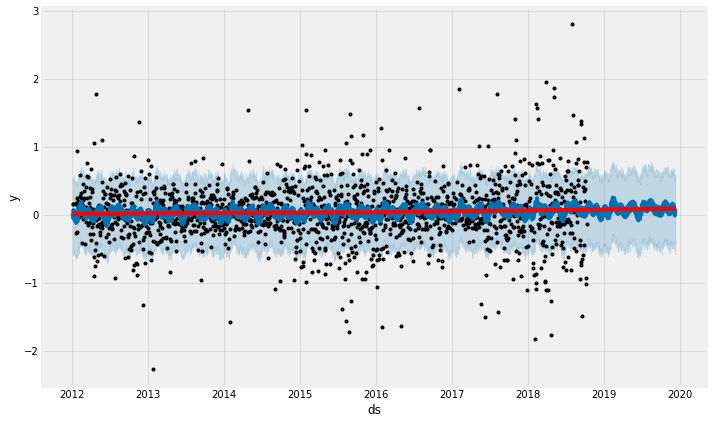

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


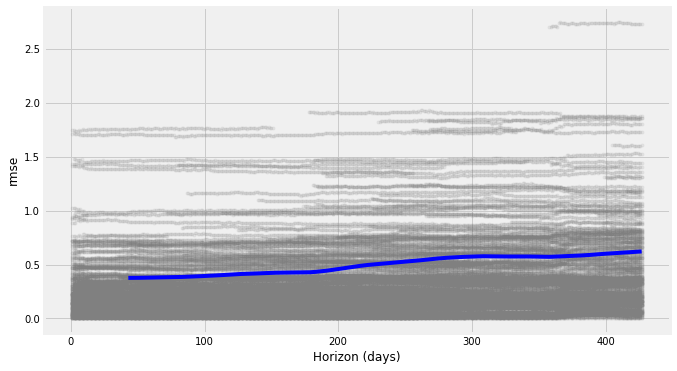

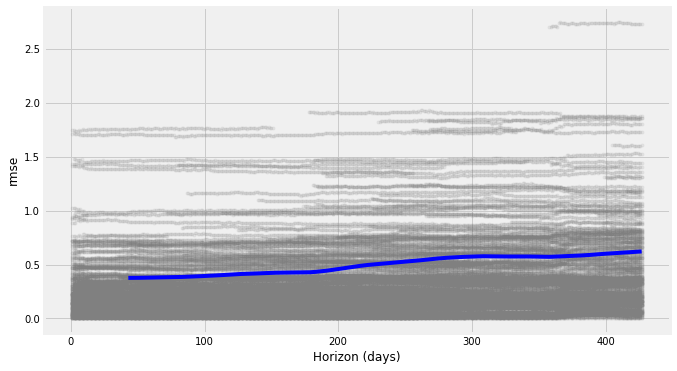

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

# **APPLE price prediction using ARIMA Model**

https://www.youtube.com/watch?v=2XGSIlgUBDI

https://www.youtube.com/watch?v=YzMV--KhI2I

## Importing Libraries

In [ ]:
import os
from numpy import math
import seaborn as sns
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the Data

In [ ]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 6, 22)
df = yf.download("AAPL", start, end)
df= df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.540044,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.607438,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.747406,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.880667,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.860235,394024400


In [ ]:
print(df.shape)
print(df.columns)

(2130, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2130 non-null   datetime64[ns]
 1   Open       2130 non-null   float64       
 2   High       2130 non-null   float64       
 3   Low        2130 non-null   float64       
 4   Close      2130 non-null   float64       
 5   Adj Close  2130 non-null   float64       
 6   Volume     2130 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 116.6 KB


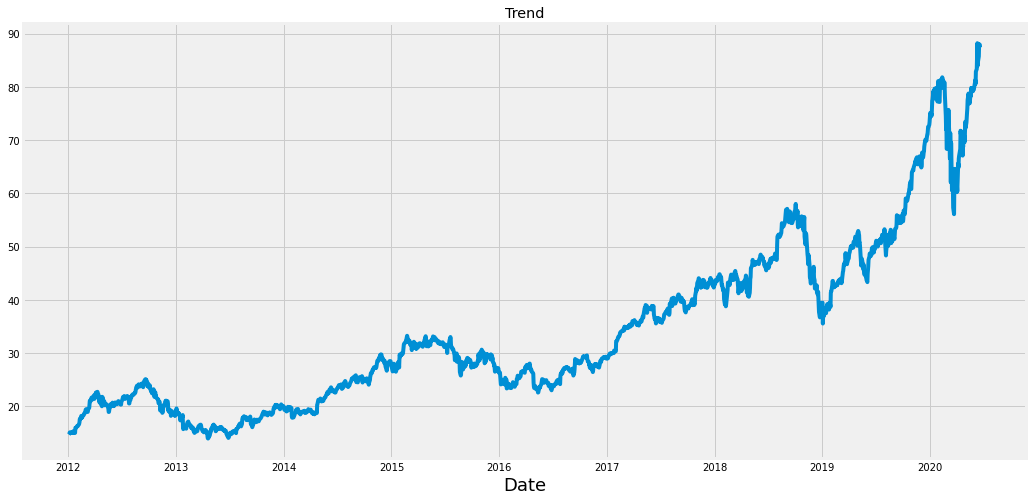

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

### Testing For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['Close'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Close'])

ADF Test Statistics : 1.0034843794766646
p-value : 0.9943025770874632
#Lags Used : 26
Number of Observations Used : 2103
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [ ]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

In [ ]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

0       0.078928
1       0.078928
2       0.163929
3       0.156072
4      -0.023929
          ...   
2125    1.047501
2126    2.272499
2127   -0.122498
2128    0.035004
2129   -0.502502
Name: Close_shift, Length: 2130, dtype: float64

In [ ]:
test_result = adfuller(df['Close_shift'])

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [ ]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -7.853470825118801
p-value : 5.5216278823808794e-12
#Lags Used : 25
Number of Observations Used : 2104
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


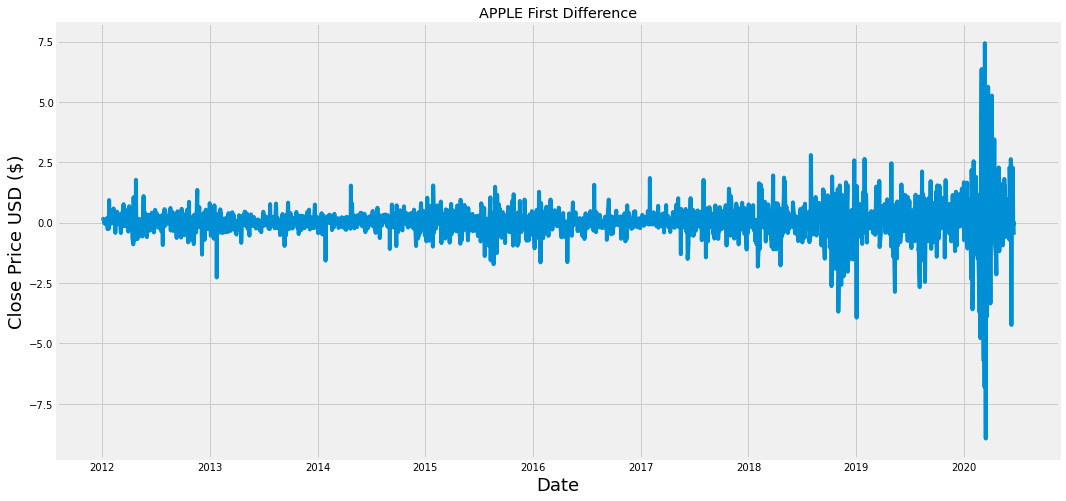

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Auto Regressive Model
Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF -- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF. -- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q. AR model - p, differencing - d, MA lags - q

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

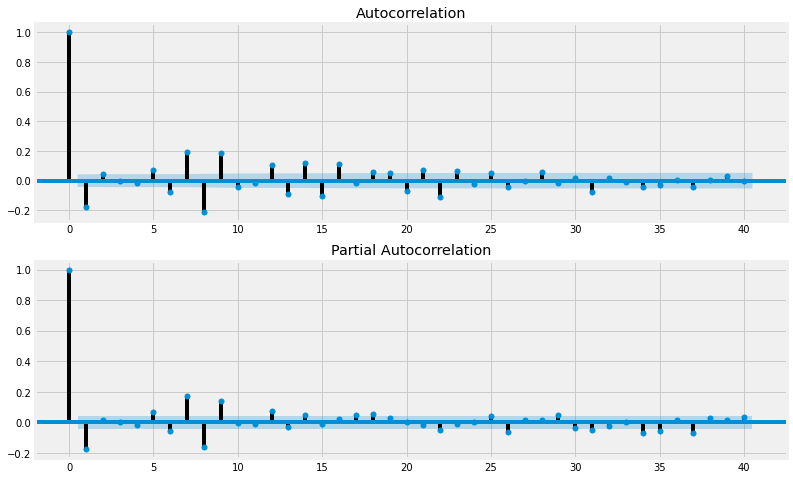

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close_shift'].iloc[1:],lags=40,ax=ax2)

# ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

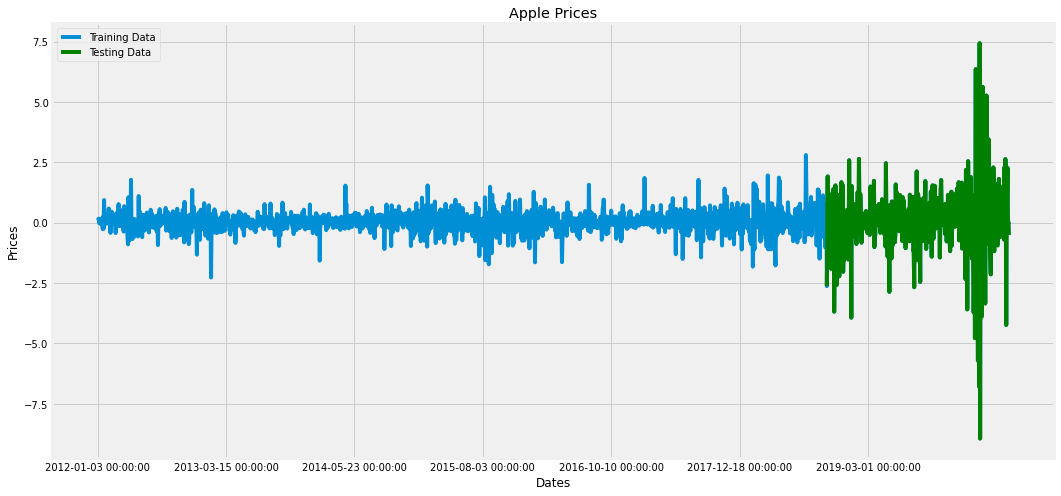

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [ ]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#model=ARIMA(train_data['Close_shift'],order=(1,1,1))
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

In [ ]:
# model_fit.summary()

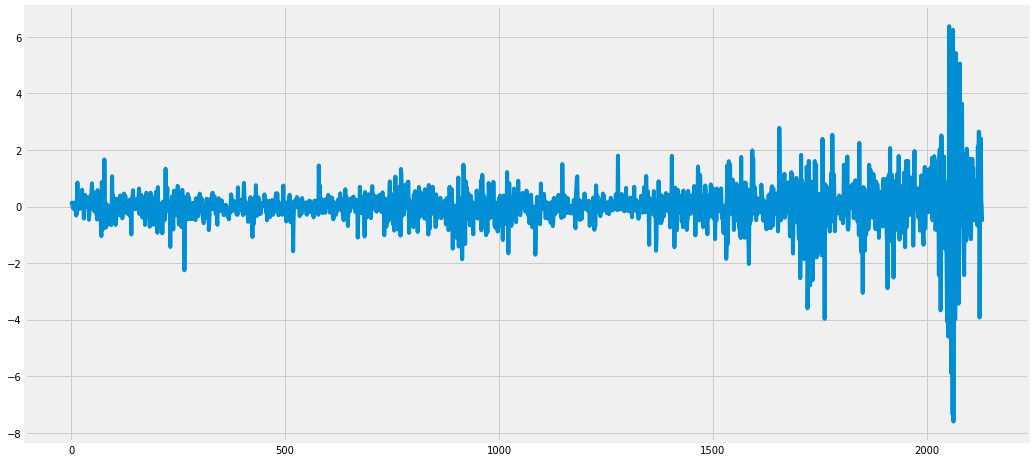

In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

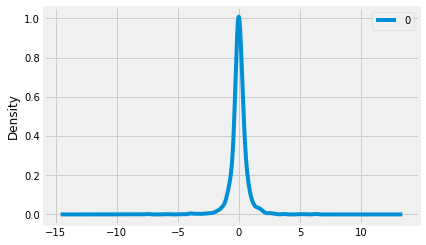

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

,0
count,2130.000000
mean,0.000003
std,0.740378
min,-7.599662
25%,-0.227720
50%,-0.006357
75%,0.260294
max,6.378032


In [ ]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [ ]:
#p_values = range(0,4)
#d_values = range(0,3)
#q_values = range(0,2)

In [ ]:
# Way-1
#import itertools
#pdq = list(itertools.product(p_values,d_values,q_values))
#pdq

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
#for param in pdq:
#  for i in range(len(test_arima)):
#        try:
#          model = ARIMA(trin_arima,order=param)
#          model_fit = model.fit(disp=0)
#          pred_y = model_fit.forecast()[0]
#          predictions.append(pred_y)
#          error = mean_sqared-error(test, predictions)
#          print(model_fit.aic)
#          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
#        except:
#          continue

In [ ]:
#for p in p_values:
#  for d in d_values:
#    for q in q_values:
#      order = (p,d,q)
#      train, test = train_arima, test_arima
#      predictions = list()
#      for i in range(len(test_arima)):
#        try:
#          model = ARIMA(train_arima,order)
#          model_fit = model.fit(disp=0)
#          pred_y = model_fit.forecast()[0]
#          predictions.append(pred_y)
#          error = mean_sqared-error(test_arima, predictions)
#          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
#        except:
#          continue

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

## **MSE and RMSE**

In [ ]:
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 3.849
RMSE : 1.962


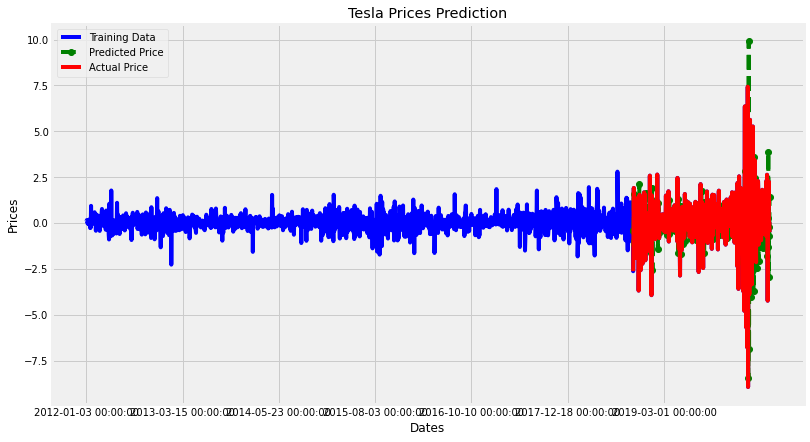

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Close_shift'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

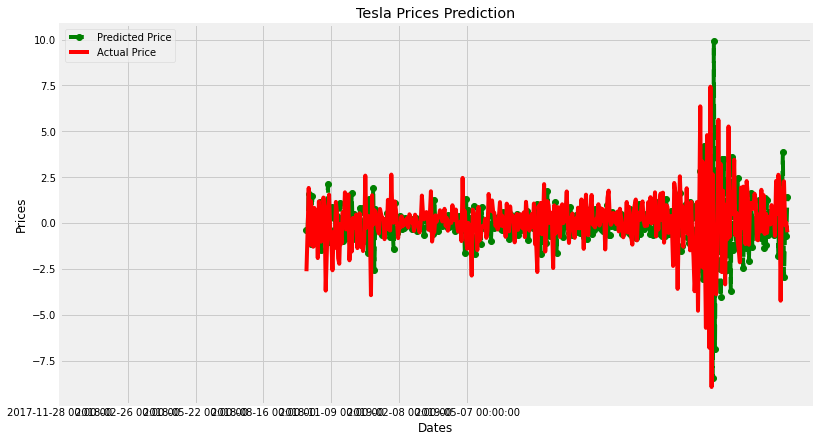

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# Conclusion:
It has been seen that, the proper selection number of layes in LSTM network and hyper-parameters p,d and q in ARIMA model
is very crucial for successful forecasting. 

In case of LSTM, we tune it for different LSTM and Dense layers and we find that two LSTM and two Dense layer is performs best. 

In case of ARIMA model we plot auto-correlation and partial auto-correlation and from the graph we choose the value of p and q, but still one need to tune the p and q value. 

From the plot of stationary data we
choose the value of I, the most common value of I is one or two. As Prophet is an advance tool it does most of the calculation
internally so very easy to use. We have considered a few important performance measures for comparing the considered three
forecasting models.

### As we see all the models performs well but we see **Prophet** wins the battle here.

# Thank You!